### Contents

1. Imports
2. Remove PII
3. Create region column
4. Drop customers with order count less than 5
5. Create profiling variable
6. Create visualization of customer profile counts
7. Summary statistics
8. Visualizations of customer profile counts by regions
9. Visualizations of departmental spending habits by customer profile

### Imports

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\rhtho\Documents\CareerFoundry\Data Immersion\Achievement 4\04-2023 Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_4.9_1.pkl'))

### Remove PII

In [5]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,State,Age,date_joined,dependents,marital_status,income,_merge
0,2539329,1,prior,1,2,8,7.0,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [3]:
ords_prods_merge = ords_prods_merge.drop(columns=["First Name","Last Name"])

In [10]:
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   eval_set                       object  
 3   order_number                   int64   
 4   order_dow                      int64   
 5   order_hour_of_day              int64   
 6   days_since_prior_order         float64 
 7   product_id                     int64   
 8   add_to_cart_order              int64   
 9   reordered                      int64   
 10  product_name                   object  
 11  aisle_id                       int64   
 12  department_id                  int64   
 13  prices                         float64 
 14  price_range_loc                object  
 15  busiest_days                   object  
 16  busiest_period_of_day          object  
 17  max_order                

### Create Region column

In [5]:
# Check for NA values
ords_prods_merge.isnull().sum()

order_id                         0
user_id                          0
eval_set                         0
order_number                     0
order_dow                        0
order_hour_of_day                0
days_since_prior_order           0
product_id                       0
add_to_cart_order                0
reordered                        0
product_name                     0
aisle_id                         0
department_id                    0
prices                           0
price_range_loc                  0
busiest_days                     0
busiest_period_of_day            0
max_order                        0
loyalty_flag                     0
mean_price                       0
spending_flag                    0
median_days_since_prior_order    0
order_frequency_flag             0
Gender                           0
State                            0
Age                              0
date_joined                      0
dependents                       0
marital_status      

In [4]:
# Check to make sure columns don't have spelling errors
ords_prods_merge["State"].value_counts(dropna=False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [14]:
# For loop
results = []

for value in ords_prods_merge["State"]:
  if value == "Maine" or value == "New Hampshire" or value == "Vermont" or value == "Massachusetts" or value == "Rhode Island" or value == "Connecticut" or value == "New York" or value == "Pennsylvania" or value == "New Jersey":
    results.append("Northeast")
  elif value == "Wisconsin" or value == "Michigan" or value == "Illinois" or value == "Indiana" or value == "Ohio" or value == "North Dakota" or value == "South Dakota" or value == "Nebraska" or value == "Kansas" or value == "Minnesota" or value == "Iowa" or value == "Missouri":
    results.append("Midwest")
  elif value == "Delaware" or value == "Maryland" or value == "District of Columbia" or value == "Virginia" or value == "West Virginia" or value == "North Carolina" or value == "South Carolina" or value == "Georgia" or value == "Florida" or value == "Kentucky" or value == "Tennessee" or value == "Mississippi" or value == "Alabama" or value == "Oklahoma" or value == "Texas" or value == "Arkansas" or value == "Louisiana":
    results.append("South")
  else:
    results.append("West")
  

In [15]:
results.count("West")

8292913

In [16]:
results.count("Northeast")

5722736

In [17]:
results.count("Midwest")

7597325

In [18]:
results.count("South")

10791885

In [19]:
# Create new column
ords_prods_merge['region'] = results

In [21]:
# Use crosstab
crosstab = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['prices'], dropna = False)

In [22]:
crosstab.to_clipboard()

This crosstab includes a wide range of prices by region.  It's difficult to interpret this, so I'll run the crosstab by price range.

In [24]:
crosstab2 = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['price_range_loc'], dropna = False)

In [25]:
crosstab2.to_clipboard()

On first glance, it looks like the regions differ in spending habits.  However, if we normalize the data by looking at the number of orders in each price range as a percentage of the total number of orders in each region, we find that the spending habits are almost identical in each region.

In [ ]:
region      High-range product	Low-range product	Mid-range product
Midwest	    0.012888484	        0.312255169     	0.674856347
Northeast	0.012791434	        0.313301714	        0.673906852
South	    0.012916187	        0.31211767	        0.674966144
West	    0.012922841	        0.312644785      	0.674432374

### Drop customers with order count less than 5

In [33]:
#Create column with total number of orders per customer
ords_prods_merge['cust_total_orders'] = ords_prods_merge.groupby('user_id')['user_id'].transform('count')

In [39]:
# For loop
cust_value = []

for value in ords_prods_merge["cust_total_orders"]:
  if value < 5:
    results.append("Low-value customer")
  else:
    results.append("Valued customer")

In [40]:
ords_prods_merge = ords_prods_merge[ords_prods_merge['cust_total_orders'] >= 5]

In [41]:
ords_prods_merge.shape

(32401975, 33)

In [42]:
# Export pickle
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'valued_cust_data_4.10.pkl'))

In [49]:
ords_prods_merge['marital_status'].value_counts(dropna=False)

married                             22754753
single                               5325187
divorced/widowed                     2771562
living with parents and siblings     1550473
Name: marital_status, dtype: int64

### Create profiling variable

In [3]:
path = r'C:\Users\rhtho\Documents\CareerFoundry\Data Immersion\Achievement 4\04-2023 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'valued_cust_data_4.10.pkl'))

In [4]:
df.loc[(df['dependents'] == 0) & (df['Age'] < 30) & (df['income'] < 67000) & (df['marital_status'] != "married"), 'cust_profile'] = "Single, under 30, no children, low income"
df.loc[(df['dependents'] == 0) & (df['Age'] < 30) & (df['income'] >= 67000) & (df['income'] < 128000)& (df['marital_status'] != "married"), 'cust_profile'] = "Single, under 30, no children, average income"
df.loc[(df['dependents'] == 0) & (df['Age'] < 30) & (df['income'] >= 128000)& (df['marital_status'] != "married"), 'cust_profile'] = "Single, under 30, no children, high income"
df.loc[(df['dependents'] > 0) & (df['Age'] < 30) & (df['income'] < 67000) & (df['marital_status'] != "married"), 'cust_profile'] = "Single, under 30, children, low income"
df.loc[(df['dependents'] > 0) & (df['Age'] < 30) & (df['income'] >= 67000) & (df['income'] < 128000) & (df['marital_status'] != "married"), 'cust_profile'] = "Single, under 30, children, average income"
df.loc[(df['dependents'] > 0) & (df['Age'] < 30) & (df['income'] >= 128000) & (df['marital_status'] != "married"), 'cust_profile'] = "Single, under 30, children, high income"
df.loc[(df['dependents'] == 0) & (df['Age'] >= 30) & (df['income'] < 67000) & (df['marital_status'] != "married"), 'cust_profile'] = "Single, over 30, no children, low income"
df.loc[(df['dependents'] == 0) & (df['Age'] >= 30) & (df['income'] >= 67000) & (df['income'] < 128000) & (df['marital_status'] != "married"), 'cust_profile'] = "Single, over 30, no children, average income"
df.loc[(df['dependents'] == 0) & (df['Age'] >= 30) & (df['income'] >= 128000) & (df['marital_status'] != "married"), 'cust_profile'] = "Single, over 30, no children, high income"
df.loc[(df['dependents'] > 0) & (df['Age'] >= 30) & (df['income'] < 67000) & (df['marital_status'] != "married"), 'cust_profile'] = "Single, over 30, children, low income"
df.loc[(df['dependents'] > 0) & (df['Age'] >= 30) & (df['income'] >= 67000) & (df['income'] < 128000) & (df['marital_status'] != "married"), 'cust_profile'] = "Single, over 30, children, average income"
df.loc[(df['dependents'] > 0) & (df['Age'] >= 30) & (df['income'] >= 128000) & (df['marital_status'] != "married"), 'cust_profile'] = "Single, over 30, children, high income"
df.loc[(df['dependents'] == 0) & (df['Age'] < 30) & (df['marital_status'] == "married") & (df['income'] < 67000), 'cust_profile'] = "Married, under 30, no children, low income"
df.loc[(df['dependents'] == 0) & (df['Age'] < 30) & (df['marital_status'] == "married") & (df['income'] >= 67000) & (df['income'] < 128000), 'cust_profile'] = "Married, under 30, no children, average income"
df.loc[(df['dependents'] == 0) & (df['Age'] < 30) & (df['marital_status'] == "married") & (df['income'] >= 128000), 'cust_profile'] = "Married, under 30, no children, high income"
df.loc[(df['dependents'] > 0) & (df['Age'] < 30) & (df['marital_status'] == "married") & (df['income'] < 67000), 'cust_profile'] = "Married, under 30, children, low income"
df.loc[(df['dependents'] > 0) & (df['Age'] < 30) & (df['marital_status'] == "married") & (df['income'] >= 67000) & (df['income'] < 128000), 'cust_profile'] = "Married, under 30, children, average income"
df.loc[(df['dependents'] > 0) & (df['Age'] < 30) & (df['marital_status'] == "married") & (df['income'] >= 128000), 'cust_profile'] = "Married, under 30, children, high income"
df.loc[(df['dependents'] == 0) & (df['Age'] >= 30) & (df['marital_status'] == "married") & (df['income'] < 67000), 'cust_profile'] = "Married, over 30, no children, low income"
df.loc[(df['dependents'] == 0) & (df['Age'] >= 30) & (df['marital_status'] == "married") & (df['income'] >= 67000) & (df['income'] < 128000), 'cust_profile'] = "Married, over 30, no children, average income"
df.loc[(df['dependents'] == 0) & (df['Age'] >= 30) & (df['marital_status'] == "married") & (df['income'] >= 128000), 'cust_profile'] = "Married, over 30, no children, high income"
df.loc[(df['dependents'] > 0) & (df['Age'] >= 30) & (df['marital_status'] == "married") & (df['income'] < 67000), 'cust_profile'] = "Married, over 30, children, low income"
df.loc[(df['dependents'] > 0) & (df['Age'] >= 30) & (df['marital_status'] == "married") & (df['income'] >= 67000) & (df['income'] < 128000), 'cust_profile'] = "Married, over 30, children, average income"
df.loc[(df['dependents'] > 0) & (df['Age'] >= 30) & (df['marital_status'] == "married") & (df['income'] >= 128000), 'cust_profile'] = "Married, over 30, children, high income"

In [10]:
df['cust_profile'].value_counts(dropna=False)

Married, over 30, children, average income       9749315
Married, over 30, children, high income          5999744
Married, over 30, children, low income           3979402
Single, over 30, no children, average income     3241847
Single, over 30, no children, high income        2013132
Married, under 30, children, average income      1584871
Married, under 30, children, low income          1405011
Single, over 30, no children, low income         1328698
Single, under 30, children, average income        839162
Single, under 30, no children, average income     805758
Single, under 30, children, low income            693363
Single, under 30, no children, low income         692739
Married, under 30, children, high income           36410
Single, under 30, children, high income            17948
Single, under 30, no children, high income         14575
Name: cust_profile, dtype: int64

### Create visualization of customer profile counts

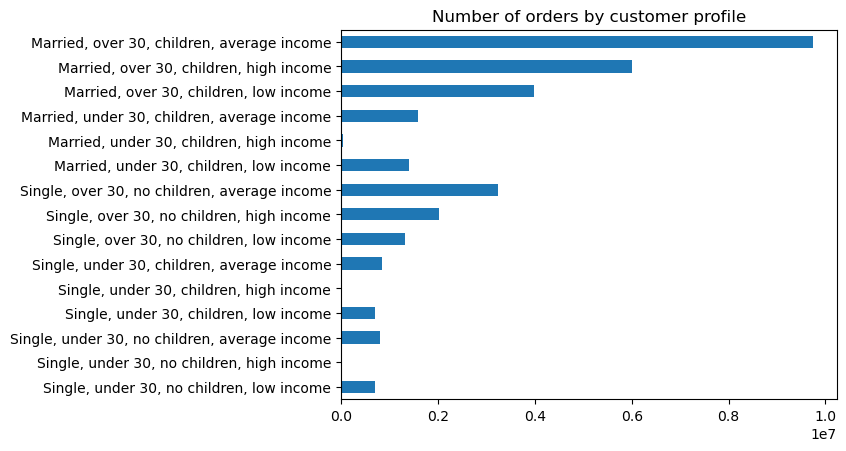

In [14]:
plt.title("Number of orders by customer profile")
bar = df['cust_profile'].value_counts().sort_index(ascending=False).plot.barh()

In [15]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_profiles.png'))

### Summary statistics

In [36]:
df.groupby(['cust_profile']).agg({'cust_total_orders': ['mean', 'min', 'max']})

cust_total_orders          
                                                           mean min   max
cust_profile                                                             
Married, over 30, children, average income           435.193913   5  3704
Married, over 30, children, high income              423.313380   5  2906
Married, over 30, children, low income               385.683906   5  2735
Married, under 30, children, average income          428.740061   5  2386
Married, under 30, children, high income             541.648833  11  2023
Married, under 30, children, low income              406.759489   5  2577
Single, over 30, no children, average income         433.135092   5  2546
Single, over 30, no children, high income            439.786431   5  2921
Single, over 30, no children, low income             380.754856   5  3637
Single, under 30, children, average income           439.453450   5  2003
Single, under 30, children, high income              558.002786  24  1438
Single, under 30, children, low income               406.513112   5  2184
Single, under 30, no children, average income        433.195672   5  2429
Single, under 30, no children, high income           473.740309  19  1219
Single, under 30, no children, low income            397.844376   5  2212

In [37]:
df.groupby('cust_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                                                     mean  min      max
cust_profile                                                           
Married, over 30, children, average income       9.108243  1.0  99999.0
Married, over 30, children, high income         19.626267  1.0  99999.0
Married, over 30, children, low income           7.130778  1.0  14900.0
Married, under 30, children, average income     10.281991  1.0  99999.0
Married, under 30, children, high income       310.276259  1.0  99999.0
Married, under 30, children, low income          7.597523  1.0  14900.0
Single, over 30, no children, average income     9.201445  1.0  99999.0
Single, over 30, no children, high income       19.726519  1.0  99999.0
Single, over 30, no children, low income         7.148696  1.0  14900.0
Single, under 30, children, average income       9.448521  1.0  99999.0
Single, under 30, children, high income        200.447888  1.0  99999.0
Single, under 30, children, low income           7.591639  1.0     25.0
Single, under 30, no children, average income    9.753596  1.0  99999.0
Single, under 30, no children, high income     409.360261  1.0  99999.0
Single, under 30, no children, low income        7.571791  1.0     25.0

### Visualizations of customer profile counts by regions

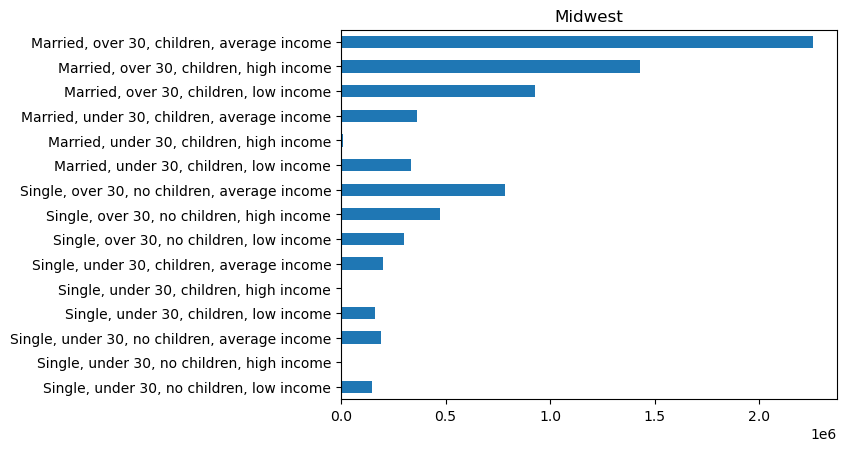

In [16]:
plt.title("Midwest")
bar_midwest = df['cust_profile'][df['region'] == "Midwest"].value_counts().sort_index(ascending=False).plot.barh()

In [17]:
bar_midwest.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_profiles_midwest.png'))

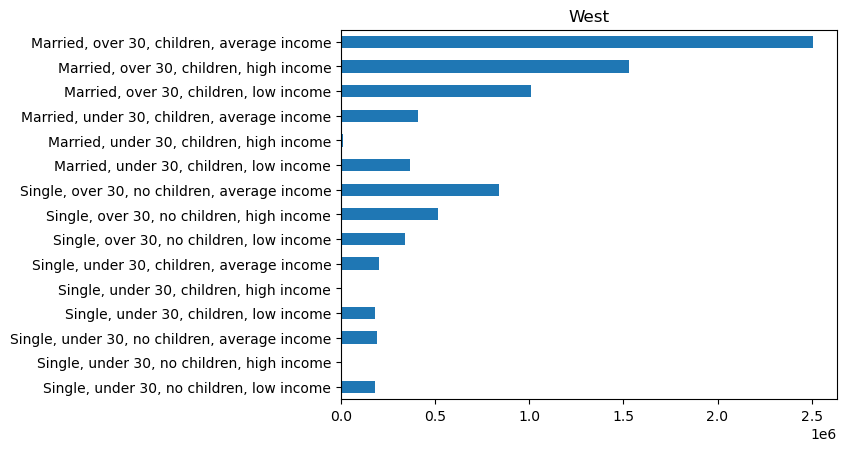

In [18]:
plt.title("West")
bar_west = df['cust_profile'][df['region'] == "West"].value_counts().sort_index(ascending=False).plot.barh()

In [19]:
bar_west.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_profiles_west.png'))

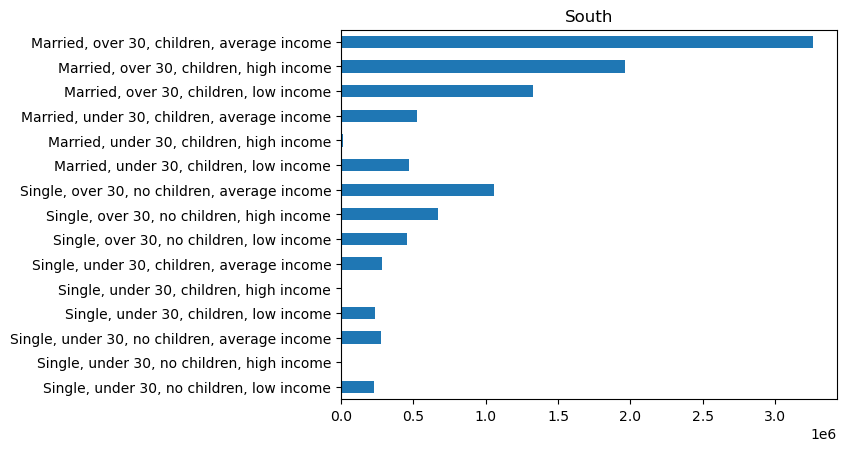

In [23]:
plt.title("South")
bar_south = df['cust_profile'][df['region'] == "South"].value_counts().sort_index(ascending=False).plot.barh()

In [24]:
bar_south.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_profiles_south.png'))

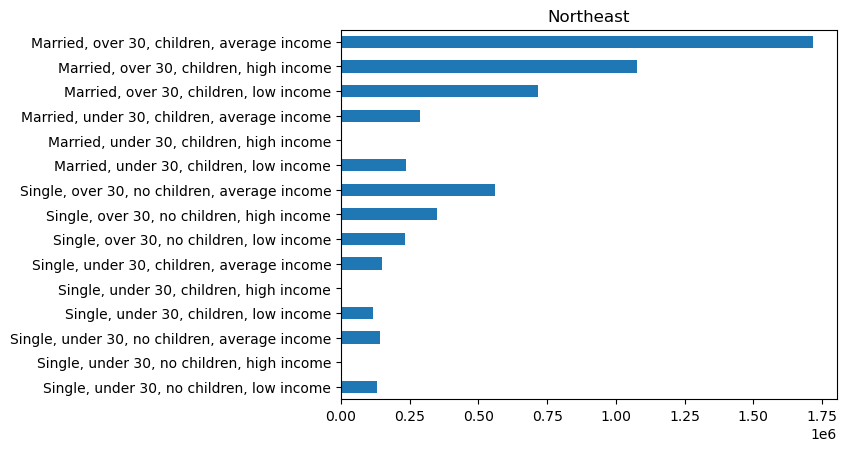

In [25]:
plt.title("Northeast")
bar_northeast = df['cust_profile'][df['region'] == "Northeast"].value_counts().sort_index(ascending=False).plot.barh()

In [26]:
bar_northeast.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_profiles_northeast.png'))

### Visualizations of departmental spending habits by customer profile 

In [27]:
# Create department column for interpretability of visualization
df.loc[(df['department_id'] == 1, 'department')] = "frozen"
df.loc[(df['department_id'] == 2, 'department')] = "other"
df.loc[(df['department_id'] == 3, 'department')] = "bakery"
df.loc[(df['department_id'] == 4, 'department')] = "produce"
df.loc[(df['department_id'] == 5, 'department')] = "alcohol"
df.loc[(df['department_id'] == 6, 'department')] = "international"
df.loc[(df['department_id'] == 7, 'department')] = "beverages"
df.loc[(df['department_id'] == 8, 'department')] = "pets"
df.loc[(df['department_id'] == 9, 'department')] = "dry goods pasta"
df.loc[(df['department_id'] == 10, 'department')] = "bulk"
df.loc[(df['department_id'] == 11, 'department')] = "personal care"
df.loc[(df['department_id'] == 12, 'department')] = "meat seafood"
df.loc[(df['department_id'] == 13, 'department')] = "pantry"
df.loc[(df['department_id'] == 14, 'department')] = "breakfast"
df.loc[(df['department_id'] == 15, 'department')] = "canned goods"
df.loc[(df['department_id'] == 16, 'department')] = "dairy eggs"
df.loc[(df['department_id'] == 17, 'department')] = "household"
df.loc[(df['department_id'] == 18, 'department')] = "babies"
df.loc[(df['department_id'] == 19, 'department')] = "snacks"
df.loc[(df['department_id'] == 20, 'department')] = "deli"
df.loc[(df['department_id'] == 21, 'department')] = "missing"

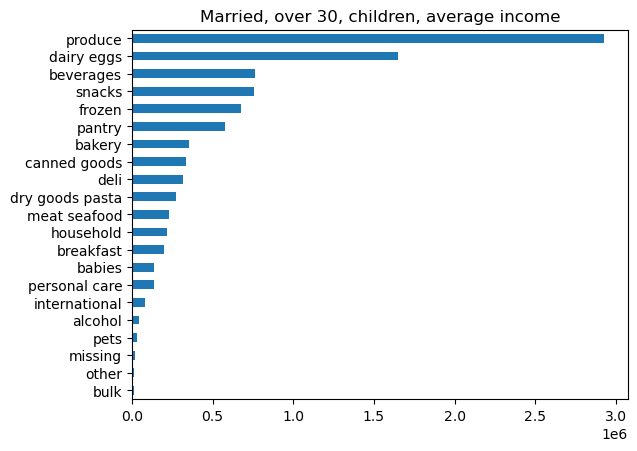

In [28]:
plt.title("Married, over 30, children, average income")
bar_MOCA = df['department'][df['cust_profile'] == "Married, over 30, children, average income"].value_counts().sort_values().plot.barh() 

In [29]:
bar_MOCA.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_MOCA.png'))

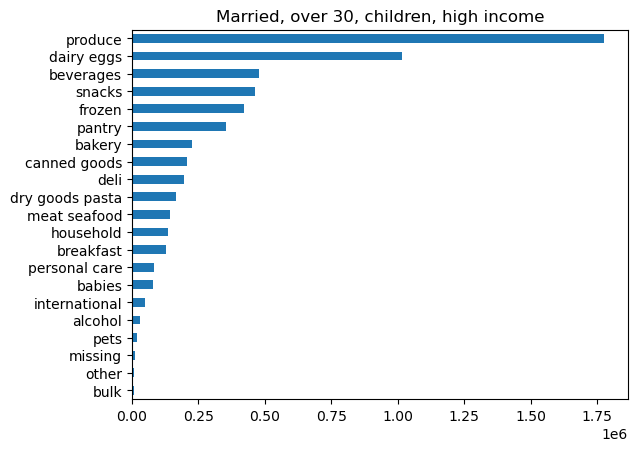

In [31]:
plt.title("Married, over 30, children, high income")
bar_MOCH = df['department'][df['cust_profile'] == "Married, over 30, children, high income"].value_counts().sort_values().plot.barh()

In [32]:
bar_MOCH.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_MOCH.png'))

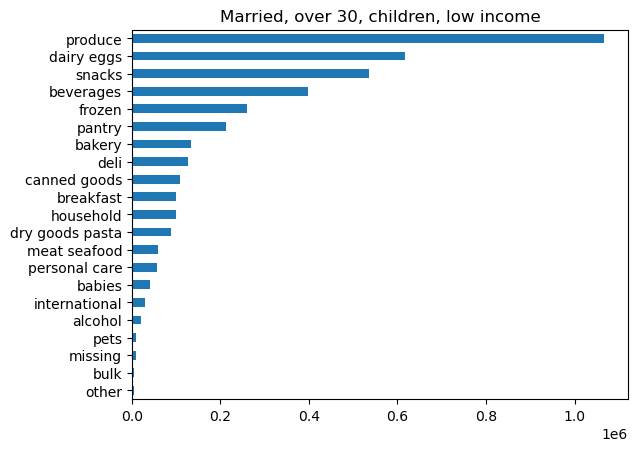

In [33]:
plt.title("Married, over 30, children, low income")
bar_MOCL = df['department'][df['cust_profile'] == "Married, over 30, children, low income"].value_counts().sort_values().plot.barh()

In [34]:
bar_MOCL.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_MOCL.png'))

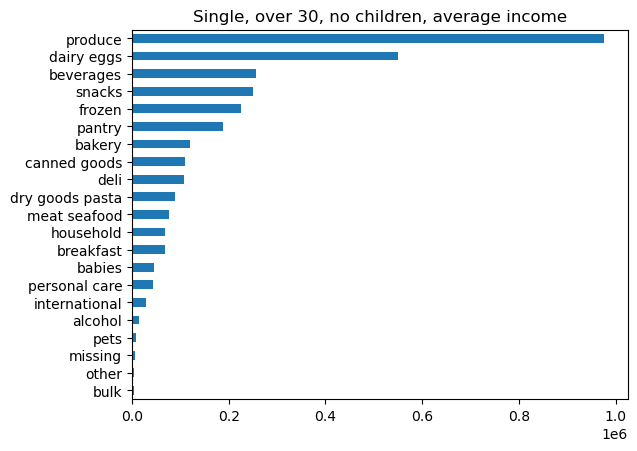

In [35]:
plt.title("Single, over 30, no children, average income")
bar_SONA = df['department'][df['cust_profile'] == "Single, over 30, no children, average income"].value_counts().sort_values().plot.barh()

In [36]:
bar_SONA.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_SONA.png'))

In [37]:
# Export pickle
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'valued_cust_data_4.10_profiled.pkl'))